In [1]:
import numpy as np
from skimage import io
import networkx as nx
import re
from pathlib import Path
import os
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from skimage import exposure

In [36]:
folder = Path('matt_preds_graphs_fwhm_single_excel/')
files  = list(folder.glob('*amended*.pickle'))
files  = sorted([x.as_posix() for x in files])
files = [x for x in files if '_0001' in x]
files = [x for x in files if '06162021_4' not in x]
len(files)

822

In [37]:
file

'matt_preds_graphs_fwhm_single_excel/06162021_45-XYZres290_warped_radii_amended.pickle'

In [38]:
for j, file_0001 in enumerate(files[:]):
    file = re.sub('_0001','',file_0001)
    graph = nx.read_gpickle(file)
    graph_0001 = nx.read_gpickle(file_0001)
    if len(list(graph_0001)) == len(list(graph)):
        for i,edge in enumerate(graph.edges):
            radii = graph.edges[edge]['radii']
            radii_0001 = graph_0001.edges[edge]['radii']
            if (radii < 1.5 or radii_0001 < 1.5) and abs(radii_0001-radii)>1:
                if len(graph.edges[edge]['pts'])>120:
                    #print(file)
                    print(j, i, radii_0001-radii, radii)

2 5 1.0158025607061345 0.9710960214883277
3 5 1.0158025607061345 0.9710960214883277
9 38 1.258315959584662 0.8304849909627113
10 38 1.258315959584662 0.8304849909627113
23 9 1.1838953287271154 1.0073560972502205
24 9 1.1838953287271154 1.0073560972502205
35 3 1.736008023288642 0.848771805006719
35 179 2.878521286551568 0.8622110802324817
35 232 -3.758549343141925 4.762795081940305
36 3 1.736008023288642 0.848771805006719
36 179 2.878521286551568 0.8622110802324817
36 232 -3.758549343141925 4.762795081940305
53 4 -2.1969758293889914 2.9725915952012487
54 4 -2.1969758293889914 2.9725915952012487


FileNotFoundError: [Errno 2] No such file or directory: 'matt_preds_graphs_fwhm_single_excel/20200217_17-XYZres121_warped_radii_forepaw_amended.pickle'

In [12]:
list(graph.edges)[151]

(133, 138)

matt_preds_graphs_fwhm_single_excel/20200217_11-XYZres91_warped_radii_forepaw_amended.pickle


FileNotFoundError: No such file: '/lustre06/project/6061907/rozakmat/TBI_monai_UNET/matt_raw_warped_single/20200217_11-XYZres91_warped_radii_forepaw_amended.pickle'

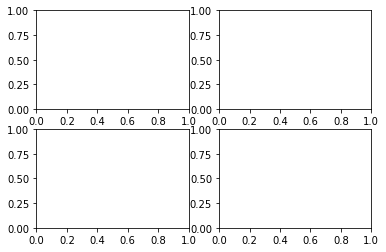

In [40]:
#[17,389],[5,199],[37,507],[24,26],[13,9],[0,18]
#[5,368],[37,307],[24,418],[13,456],[13,394],[17,86]
#files_edge = np.array([[17,389],[37,507],[24,26],[13,9],[0,18]])
files_edge = np.array([[2,5],[3,5]])
fig, ax = plt.subplots(len(files_edge),2)
position = ['lower center','center left', 'lower center','lower left','upper right', 'upper left']
#position = ['lower center','lower center', 'lower center','lower center','lower left', 'upper right']
for i,params in enumerate(files_edge):
    file_0001 = files[params[0]]
    file = re.sub('_0001','',file_0001)
    print(file)
    img = io.imread(re.sub('_radii_amended.pickle','.tif',re.sub('matt_preds_graphs_fwhm_single_excel','matt_raw_warped_single',file)))
    img_0001 = io.imread(re.sub('_radii_amended.pickle','.tif',re.sub('matt_preds_graphs_fwhm_single_excel','matt_raw_warped_single',file_0001)))
    img_ch2 = sp.ndimage.zoom(np.swapaxes(img[:,1,:,:],0,2),(1,1,2.645833333))
    img = sp.ndimage.zoom(np.swapaxes(img[:,0,:,:],0,2),(1,1,2.645833333))
    img_0001_ch2 = sp.ndimage.zoom(np.swapaxes(img_0001[:,1,:,:],0,2),(1,1,2.645833333))
    img_0001 = sp.ndimage.zoom(np.swapaxes(img_0001[:,0,:,:],0,2),(1,1,2.645833333))
    graph = nx.read_gpickle(file)
    graph_0001 = nx.read_gpickle(file_0001)
    edges = list(graph.edges)
    edge = edges[params[1]]
    print(edges[params[1]])
    radii = graph.edges[edge]['radii']
    radii_0001 = graph_0001.edges[edge]['radii']
    pts = graph.edges[edge]['pts']
    mx = np.max(pts,axis=0) +5
    mn = np.min(pts,axis=0) - 5
    pt = pts[:,:2]- np.array([mn[0],mn[1]]) - 1
    _img = exposure.equalize_adapthist(np.max(img[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    _show_img = np.zeros(list(_img.shape) + [3])
    _show_img[:,:,0] = _img
    _show_img[:,:,1] = 0.7*exposure.equalize_adapthist(np.max(img_ch2[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    ax[i,0].imshow(_show_img)
    ax[i,0].tick_params(left = False, right = False, labelleft = False ,labelbottom = False, bottom = False)
    print(radii_0001-radii)
    ax[i,0].set_ylabel("{:.2f}".format(round((radii_0001-radii)*2, 2)) + str(u' \u03bcm'), rotation=0, fontsize=20, ha='right')
    scalebar = ScaleBar(1,units="um", 
                        length_fraction = 0.5, 
                        location = position[i], 
                        pad=0.1, 
                        color='white', 
                        frameon=False,
                        width_fraction = 0.05) # 1 pixel = 0.2 meter
    scalebar2 = ScaleBar(1,units="um", 
                        length_fraction = 0.5, 
                        location = position[i], 
                        pad=0.1, 
                        color='white', 
                        frameon=False,
                        width_fraction = 0.05) # 1 pixel = 0.2 meter
    ax[i,0].add_artist(scalebar)
    #ax[i,1].add_artist(scalebar2)
    _img_0001 = np.max(img_0001[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2)
    _show_img_0001 = np.zeros(list(_img_0001.shape) + [3])
    _show_img_0001[:,:,0] = exposure.equalize_adapthist(_img_0001, clip_limit=0.03)
    _show_img_0001[:,:,1] = 0.7*exposure.equalize_adapthist(np.max(img_0001_ch2[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    ax[i,1].imshow(_show_img_0001)
    ax[i,1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
fig.set_figheight(16)
fig.set_figwidth(7)
fig.tight_layout()
#fig.savefig('seeingIsBeiliving_James.png')

In [11]:
i

0

In [109]:
import monai
monai.__version__

'0.8.0'

In [ ]:
graph.edges[edge]

matt_preds_graphs_fwhm_single_excel/vbm07 Mar 24 2020-XYZres024_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm04 Feb 27 2020-XYZres012_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm11 Apr 04 2020-XYZres047_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm09 Mar 28 2020-XYZres033_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm05 Feb 28 2020-XYZres020_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm03 Feb 26 2020-XYZres007_warped_radii_amended_AVC.pickle


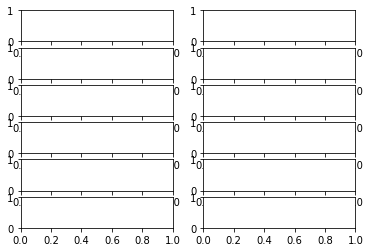

In [5]:
#[17,389],[5,199],[37,507],[24,26],[13,9],[0,18]
#[5,368],[37,307],[24,418],[13,456],[13,394],[17,86]
files_edge = np.array([[17,389],[5,199],[37,507],[24,26],[13,9],[0,18]])
fig, ax = plt.subplots(len(files_edge),2)
position = ['lower center','center left', 'lower center','lower left','upper right', 'upper left']
#position = ['lower center','lower center', 'lower center','lower center','lower left', 'upper right']
for i,params in enumerate(files_edge):
    file_0001 = files[params[0]]
    file = re.sub('_0001','',file_0001)
    print(file)

matt_preds_graphs_fwhm_single_excel/vbm04 Feb 27 2020-XYZres012_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm11 Apr 04 2020-XYZres047_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm09 Mar 28 2020-XYZres033_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm05 Feb 28 2020-XYZres020_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm05 Feb 28 2020-XYZres020_warped_radii_amended_AVC.pickle
matt_preds_graphs_fwhm_single_excel/vbm07 Mar 24 2020-XYZres024_warped_radii_amended_AVC.pickle


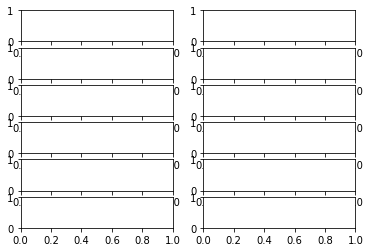

In [6]:
#[17,389],[5,199],[37,507],[24,26],[13,9],[0,18]
#[5,368],[37,307],[24,418],[13,456],[13,394],[17,86]
files_edge = np.array([[5,368],[37,307],[24,418],[13,456],[13,394],[17,86]])
fig, ax = plt.subplots(len(files_edge),2)
position = ['lower center','center left', 'lower center','lower left','upper right', 'upper left']
#position = ['lower center','lower center', 'lower center','lower center','lower left', 'upper right']
for i,params in enumerate(files_edge):
    file_0001 = files[params[0]]
    file = re.sub('_0001','',file_0001)
    print(file)